# Titanic Survival Prediction


## 1. Import Libraries and Load Data

First, let's import the necessary libraries and load our training and testing datasets.

First lets import the data

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [46]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 2. Exploratory Data Analysis (EDA)

Now, let's explore the data to understand its structure, find patterns, and identify missing values.

In [47]:
# Your EDA code here. 
# Examples: 
# - train_df.info()
# - train_df.describe()
# - sns.countplot(x='Survived', data=train_df)
# - sns.catplot(x='Sex', col='Survived', kind='count', data=train_df)

In [48]:
print("Null values per column:")
print(train.isnull().sum())

Null values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


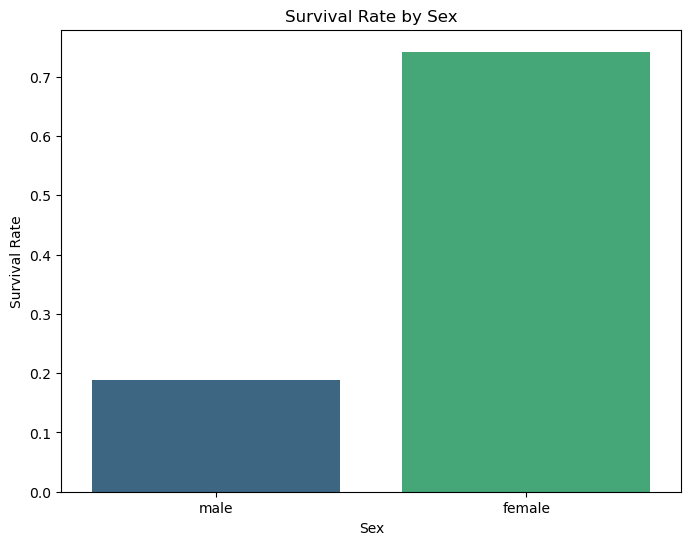

In [49]:

survival_by_sex = train.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train, ci=None, palette='viridis')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

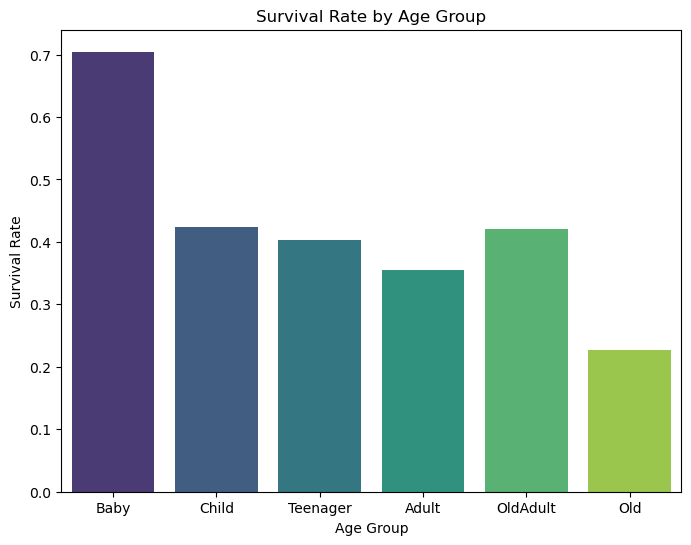

In [50]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 5, 14, 18, 30, 60, 100], labels=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'])
survival_by_age_group = train.groupby('AgeGroup')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=train, ci=None, order=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'], palette='viridis')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()


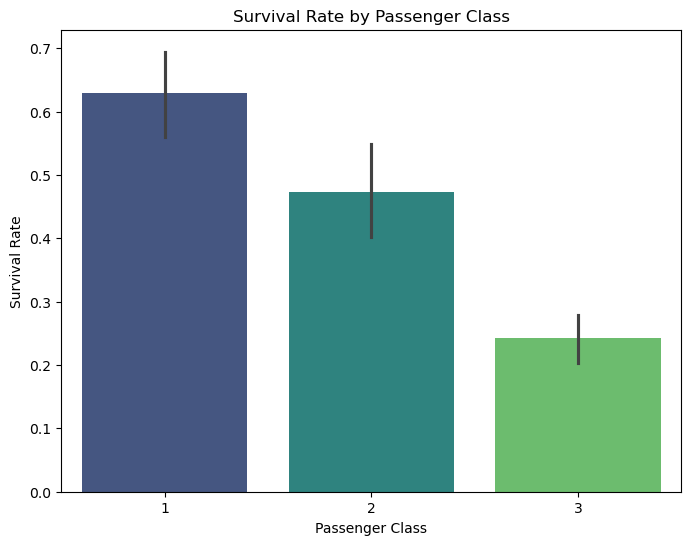

In [51]:
survival_by_pclass = train.groupby('Pclass')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

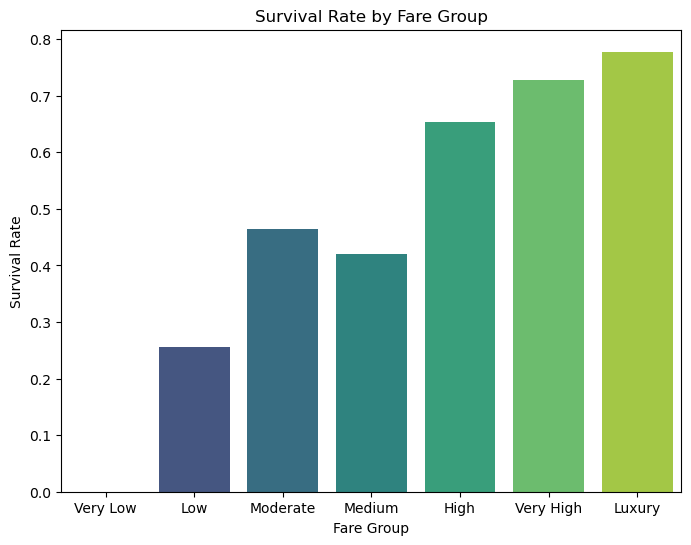

In [52]:
train = pd.read_csv('data/train.csv')

train['FareClass'] = pd.cut(train['Fare'], bins= [0, 5, 15, 25, 50, 100, 250, float('inf')],
                         labels=['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury'])
survival_by_fare = train.groupby('FareClass')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x='FareClass', y='Survived', data=train, ci=None, order=['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury'], palette='viridis')
plt.title('Survival Rate by Fare Group')
plt.ylabel('Survival Rate')
plt.xlabel('Fare Group')
plt.show()

## 3. Data Cleaning & Feature Engineering

Based on our EDA, we'll clean the data by handling missing values and create new features to improve our model's performance.

In [53]:
# Your data cleaning and feature engineering code here.
# Examples:
# - Handle missing 'Age' values
# - Convert 'Sex' to numerical values
# - Create a 'FamilySize' feature

In [54]:

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

def pre(df):

    df['Family'] = df['Parch'] + df['SibSp']
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 
                                       'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # Fill missing embarked with the most frequent value
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Fill missing fare with the median
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Create fare classes
    df['Very Low'] = (df['Fare'] <= 4)
    df['Low'] = (df['Fare'] > 4) & (df['Fare'] <= 15)
    df['Moderate'] = (df['Fare'] > 15) & (df['Fare'] <= 25)
    df['Medium'] = (df['Fare'] > 25) & (df['Fare'] <= 50)
    df['High'] = (df['Fare'] > 50) & (df['Fare'] <= 100)
    df['Very High'] = (df['Fare'] > 100) & (df['Fare'] <= 250)
    df['Luxury'] = (df['Fare'] > 250)

    # Convert cabin to first letter and fill missing values with 'N'
    df['Cabin'] = df['Cabin'].fillna('N').map(lambda x: x[0])
    
    # Fill missing age with the median or using KNN Imputer
    age_imputer = KNNImputer(n_neighbors=5)
    df['Age'] = age_imputer.fit_transform(df[['Age']])
    
    # Create age categories
    df['Baby'] = (df['Age'] <= 5)
    df['Child'] = (df['Age'] > 5) & (df['Age'] <= 14)
    df['Teenager'] = (df['Age'] > 14) & (df['Age'] <= 18)
    df['Adult'] = (df['Age'] > 18) & (df['Age'] <= 30)
    df['OldAdult'] = (df['Age'] > 30) & (df['Age'] <= 60)
    df['Old'] = (df['Age'] > 60)
    df['Alone'] = df['Family'] == 0
    
    # One-hot encoding
    df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title', 'Cabin'], drop_first=True)
    #in case there is a cabin that was not mentioned, create it and fill it with False
    for l in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']:
        col = f'Cabin_{l}'
        if col not in df.columns:
            df[col] = pd.Series([False]*df.shape[0])
            df[col].fillna(False, inplace=True)
    
    # Select relevant columns
    cols = ['Age', 'Fare', 'Family', 'Parch', 'SibSp', 'Alone', 'Pclass', 'Very Low', 'Low', 'Moderate', 'Medium',
       'High', 'Very High', 'Luxury', 'Baby', 'Child', 'Teenager',
       'Adult', 'OldAdult', 'Old', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T'] #Cabin_N was ignored
    df2 = df[cols].copy()
    
    # Scale numeric features
    numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']
    scaler = StandardScaler()
    df2[numeric_features] = scaler.fit_transform(df2[numeric_features])
    
    return df2


## 4. Model Training and Evaluation

It's time to choose a model, train it on our processed data, and see how well it performs.

In [55]:
# Your model training code here.
# Examples:
# - from sklearn.model_selection import train_test_split
# - from sklearn.linear_model import LogisticRegression
# - Define features (X) and target (y)
# - Split data, train model, check accuracy

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

train = pd.read_csv('data/train.csv')

train_processed = pre(train)

X = train_processed
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#### Final model : 

In [57]:
rf_model = RandomForestClassifier(
    n_estimators=110,
    max_depth=12,
    min_samples_split=8,
    min_samples_leaf=1,
    max_features=0.15,
    random_state=900,
    bootstrap=True
) 
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8379888268156425

## 5. Create Submission File

Finally, we'll use our trained model to make predictions on the test set and generate the submission file in the required format.

In [58]:
# Your submission generation code here.
# - Process the test_df in the same way as train_df
# - model.predict(X_test)
# - Create a submission DataFrame and save to 'submission.csv'

In [59]:
train = pd.read_csv('data/train.csv')

train_processed = pre(train)

X = train_processed
y = train['Survived']

test = pd.read_csv('data/test.csv')

test_processed = pre(test)

ids = test['PassengerId']
X_t = test_processed

In [60]:
rf_model.fit(X, y)
preds = rf_model.predict(X_t)
ids = test['PassengerId']
PredictionDF = pd.DataFrame({'PassengerId' : ids, 'Survived' : preds})
PredictionDF.to_csv('submissions.csv', index=False)

